# Model's predictions comparison

**NOTEBOOK GOAL**: Compare predictions of models

In [1]:
from import_man import *
from BIP import apply_BIP_submission_structure

In [2]:
test_m34_53_RFR_on_prep = pd.read_csv('./dataset/test_m34_53_RFR_on_prep.csv')

In [3]:
test_m34_72_AVG_Month_Ensemble = pd.read_csv('./dataset/test_m34_72_AVG_Month_Ensemble.csv')

In [4]:
# just give the dataframes a short name
t53 = test_m34_53_RFR_on_prep
t72 = test_m34_72_AVG_Month_Ensemble

In [5]:
ts53 = apply_BIP_submission_structure(t53)
ts53.reset_index(inplace=True)
print(ts53.shape)
ts53.head()

(1498, 3)


,StoreID,D_Month,NumberOfSales
0,1000,3,159849.519585
1,1000,4,173315.350040
2,1001,3,87860.874962
3,1001,4,76769.695316
4,1002,3,131641.002234


In [6]:
ts72 = apply_BIP_submission_structure(t72)
ts72.reset_index(inplace=True)
print(ts72.shape)
ts72.head()

(1498, 3)


,StoreID,D_Month,NumberOfSales
0,1000,1,192640.24
1,1000,2,175253.00
2,1001,1,68836.56
3,1001,2,64795.00
4,1002,1,119249.52


In [7]:
#col = ts72['type'].map({'a':'r', 'b':'b', 'c':'y'})

#ax = df.plot.scatter(x='StoreID', y='NumberOfSales', c=col)

#ts72[['x','y','id']].apply(lambda x: ax.text(*x),axis=1)

In [8]:
print(ts53.shape)
rows = ts53.shape[0]
df_plt = pd.DataFrame(index=range(0, int(rows/2)))


months = ts53['D_Month'].unique()
# first month of ts53
tmp = ts53[ts53.D_Month == months[0]]
tmp.reset_index(drop=True, inplace=True)
lbl = 'NumberOfSales_' + str(months[0]) + '_RFR'
df_plt[lbl] = tmp['NumberOfSales']
# second month of ts53
tmp = ts53[ts53.D_Month == months[1]]
tmp.reset_index(drop=True, inplace=True)
lbl = 'NumberOfSales_' + str(months[1]) + '_RFR'
df_plt[lbl] = tmp['NumberOfSales'] 



months = ts72['D_Month'].unique()
# first month of ts53
tmp = ts72[ts72.D_Month == months[0]]
tmp.reset_index(drop=True, inplace=True)
lbl = 'NumberOfSales_' + str(months[0]) + '_AVG'
df_plt[lbl] = tmp['NumberOfSales']
# second month of ts53
tmp = ts72[ts72.D_Month == months[1]]
tmp.reset_index(drop=True, inplace=True)
lbl = 'NumberOfSales_' + str(months[1]) + '_AVG'
df_plt[lbl] = tmp['NumberOfSales'] 


df_plt.index += 1000

df_plt.head()

(1498, 3)


,NumberOfSales_3_RFR,NumberOfSales_4_RFR,NumberOfSales_1_AVG,NumberOfSales_2_AVG
1000,159849.519585,173315.350040,192640.24,175253.0
1001,87860.874962,76769.695316,68836.56,64795.0
1002,131641.002234,118399.650895,119249.52,116822.0
1003,138811.648902,120642.667073,131549.60,128683.0
1004,105999.235131,93135.458919,87098.00,92033.0


In [9]:
#df_plt1.plot.bar(x='StoreID', figsize=(16,9));

#col = ts72['type'].map({'NumberOfSales_RFR':'r', 'NumberOfSales_AVG':'b', 'c':'y'})

#ax = df_plt.plot.scatter(x='StoreID', y='NumberOfSales', c=col)

#df_plt[['NumberOfSales_RFR','NumberOfSales_AVG','StoreID']].apply(lambda x: ax.text(*x), axis=1)

#df_plt_1 = df_plt[df_plt.index < 1375]
#df_plt_2 = df_plt[df_plt.index >= 1375]
#
#df_plt_1.plot(kind='bar', figsize=(16,9))
#df_plt_2.plot(kind='bar', figsize=(16,9))

# FIRST MONTH: Bar plots for models' predictions comparison  

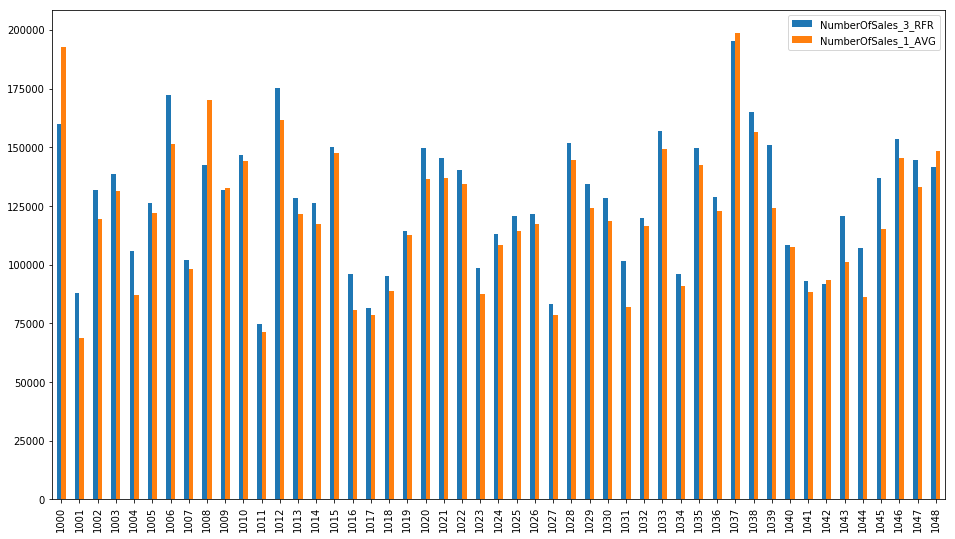

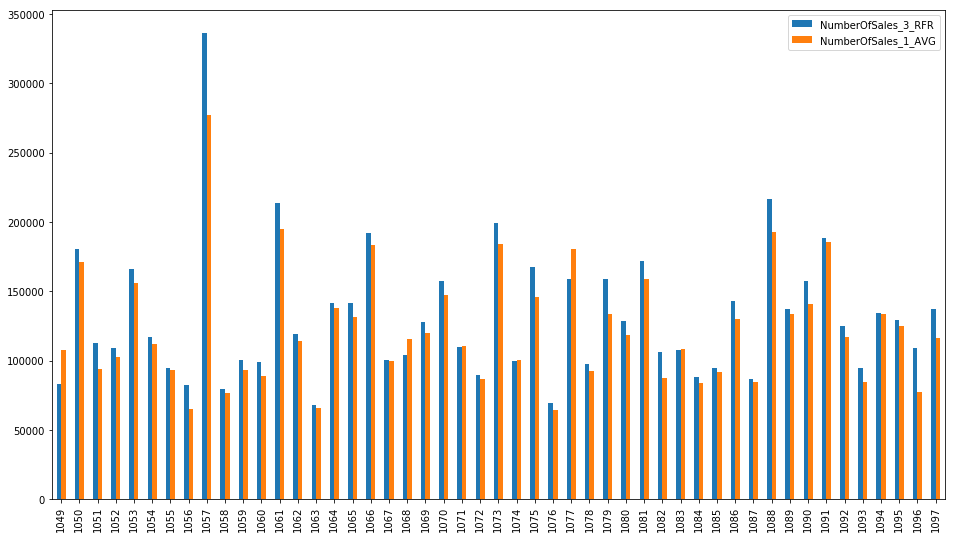

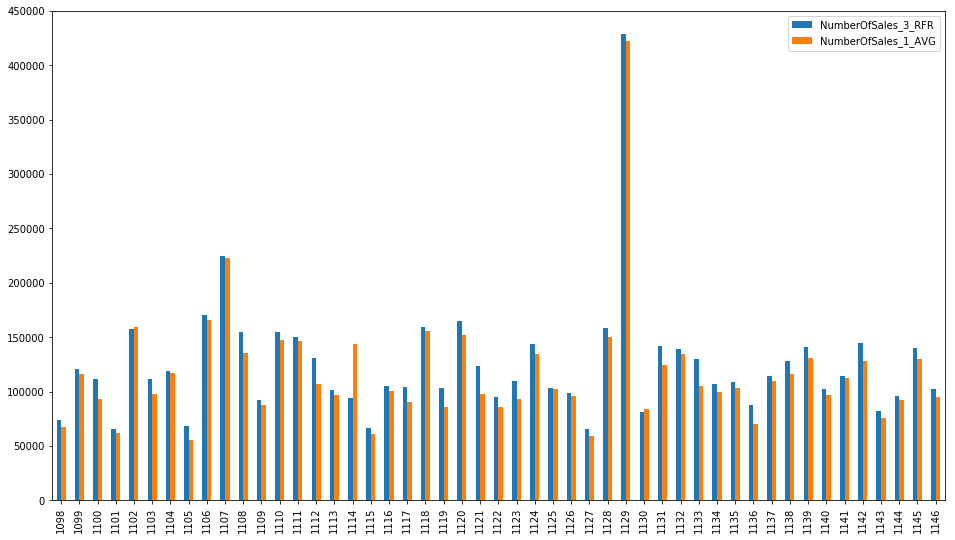

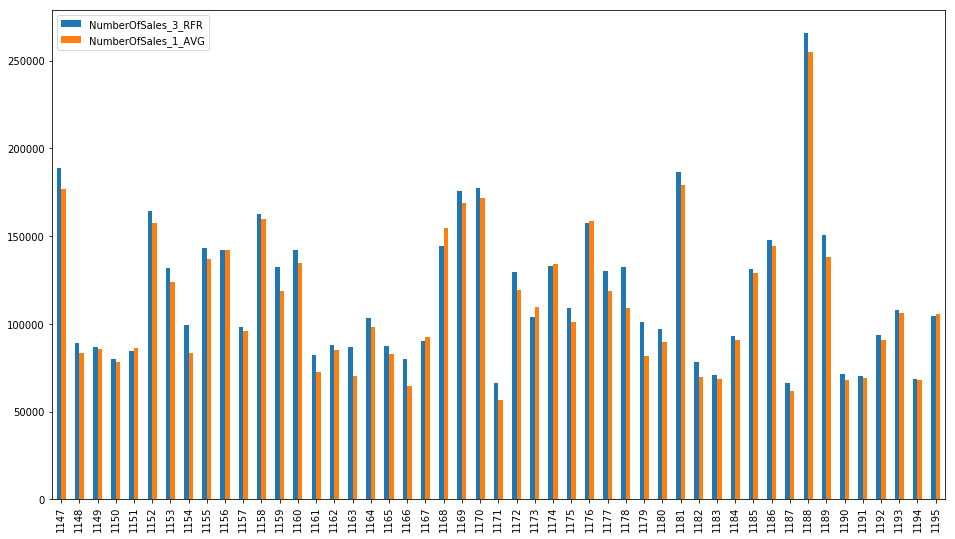

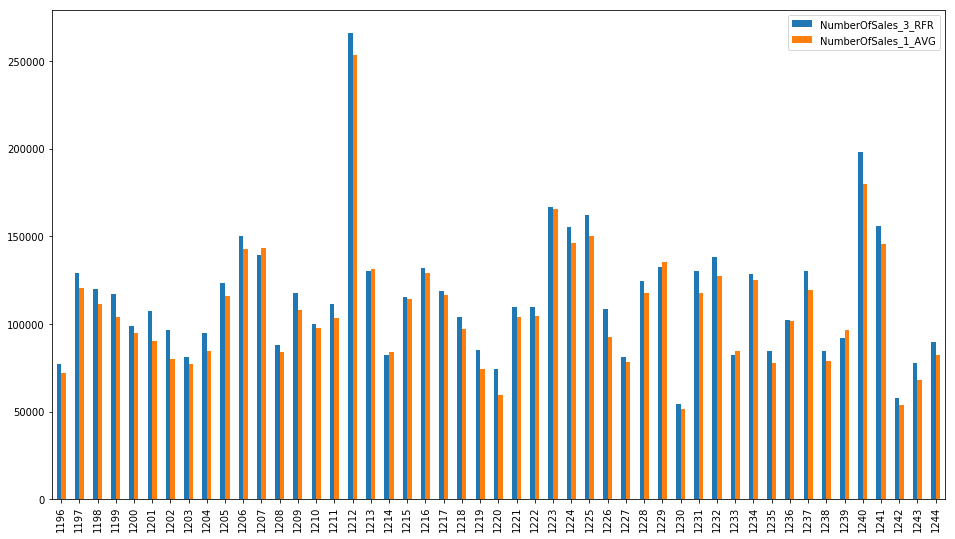

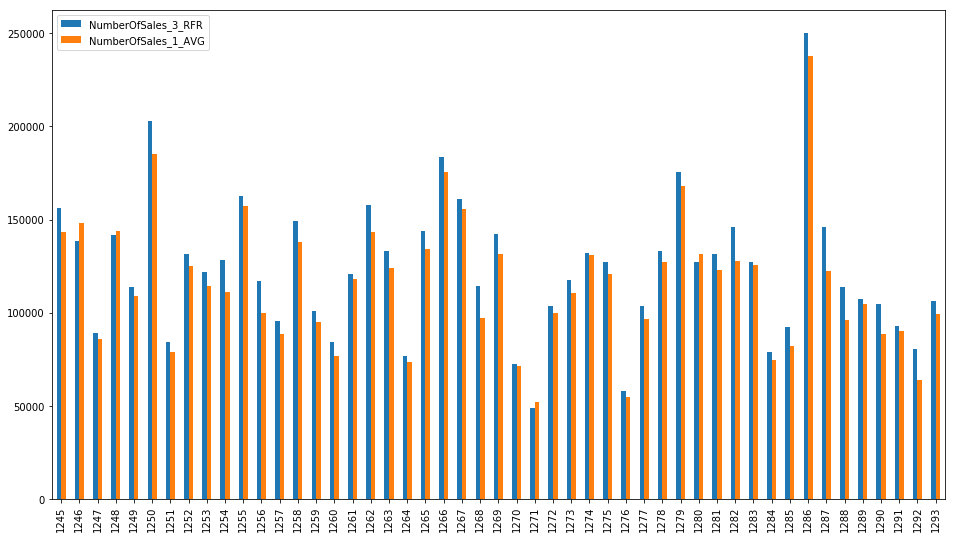

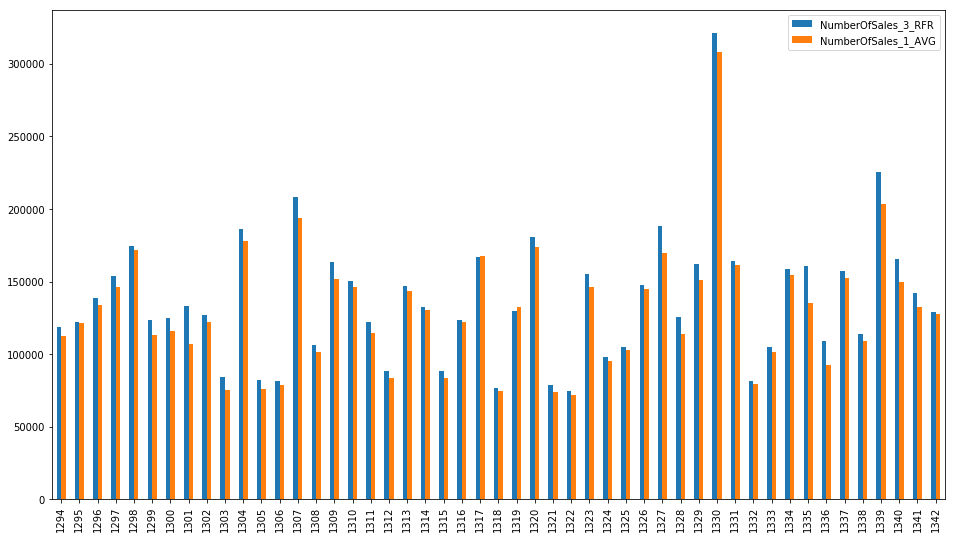

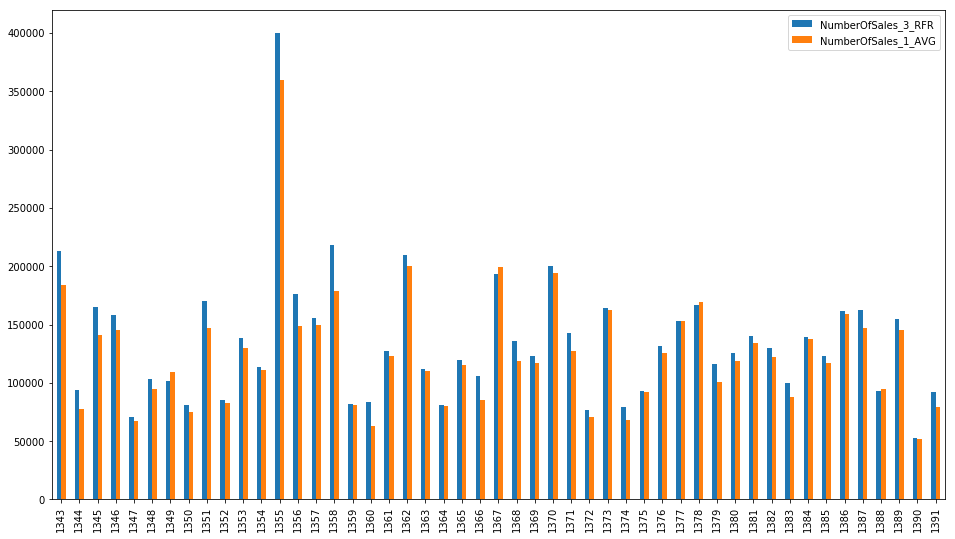

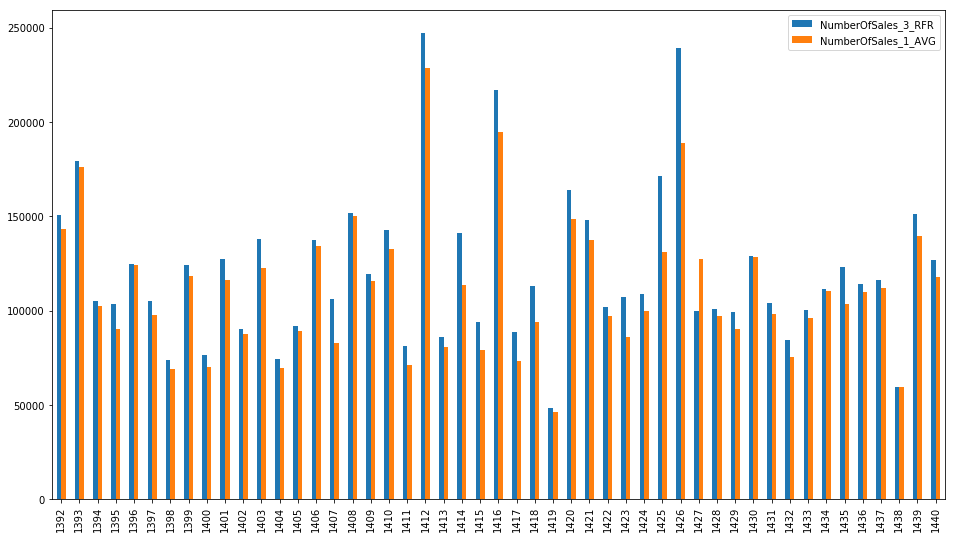

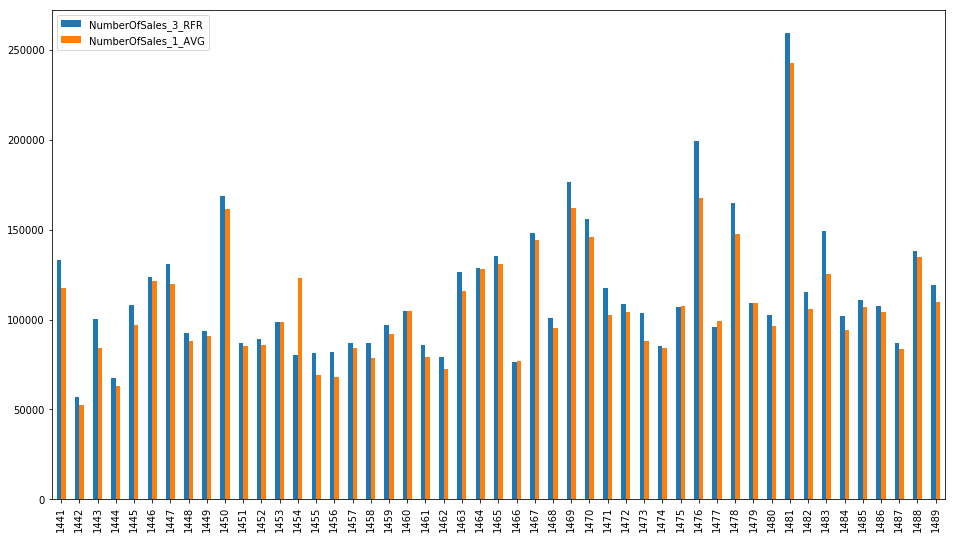

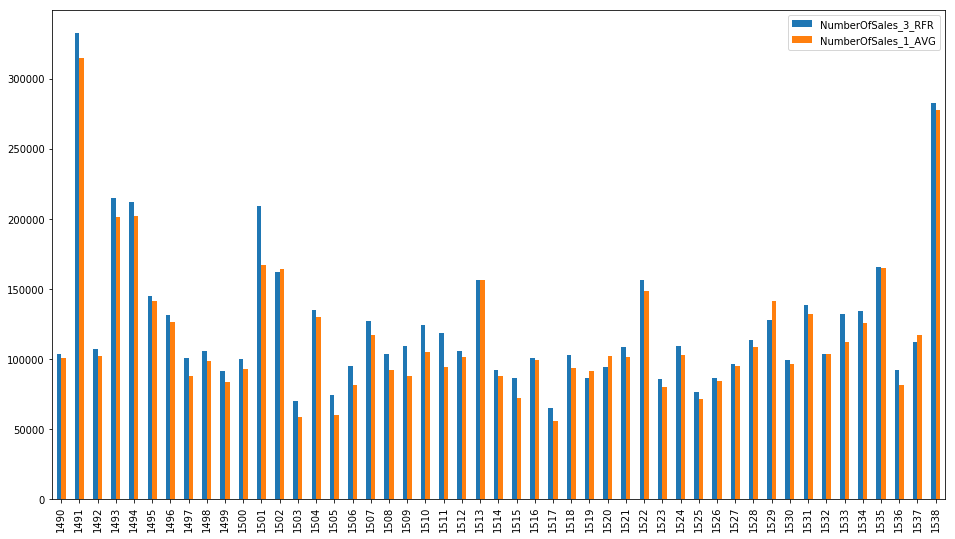

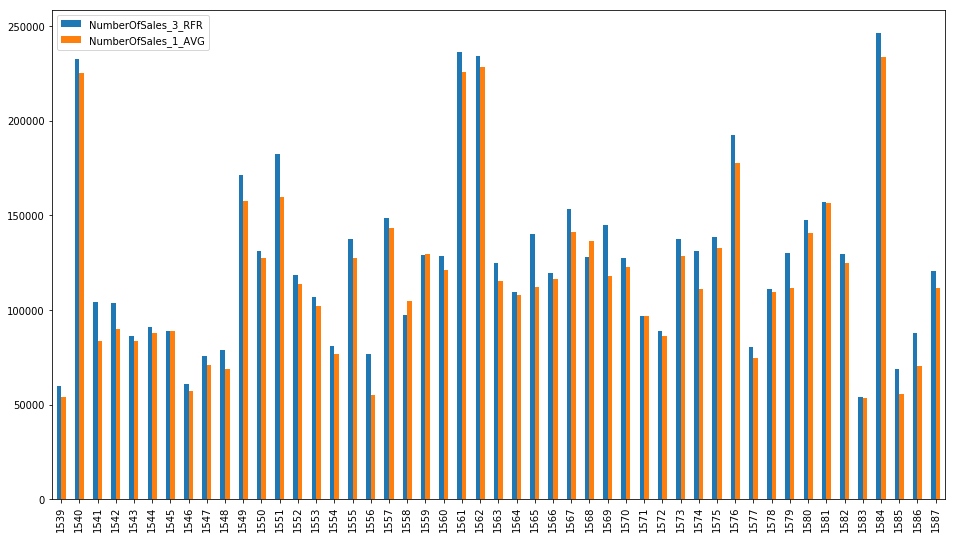

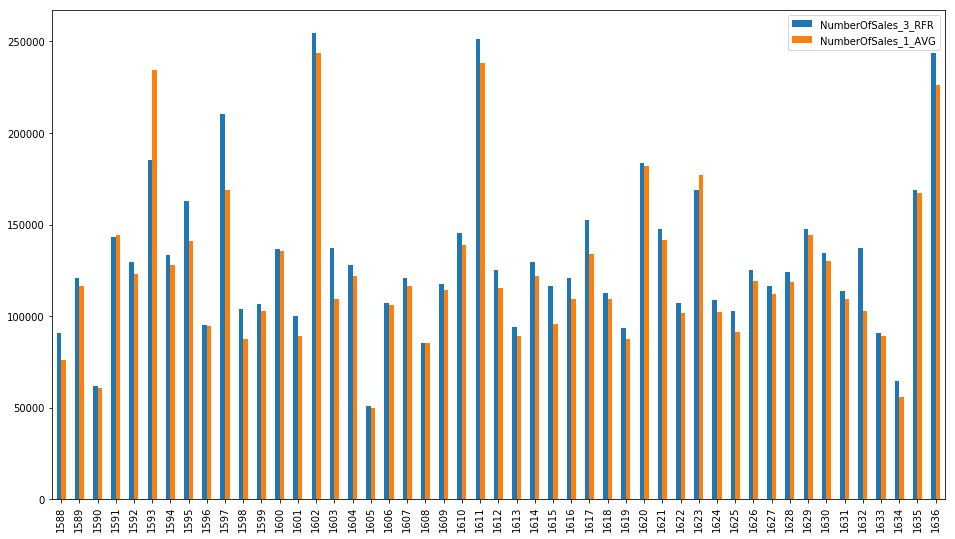

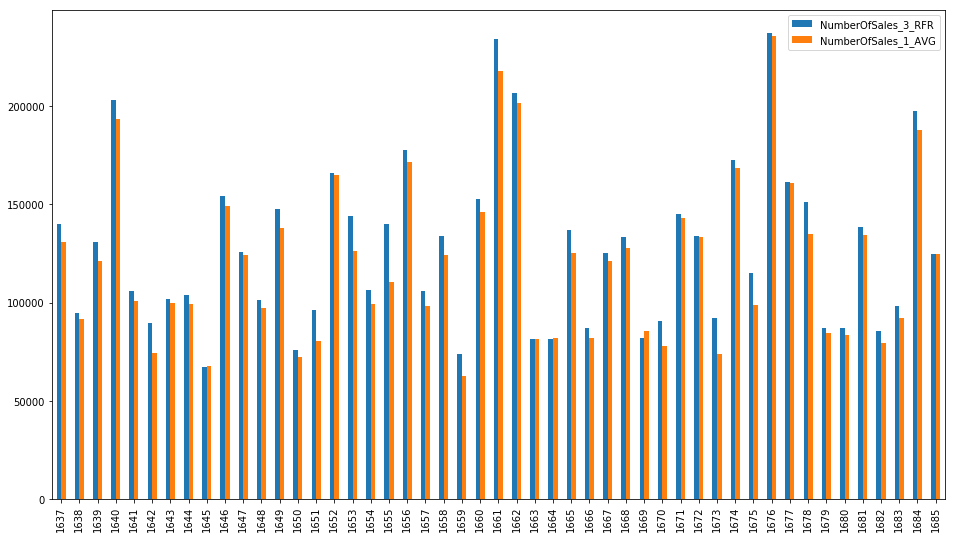

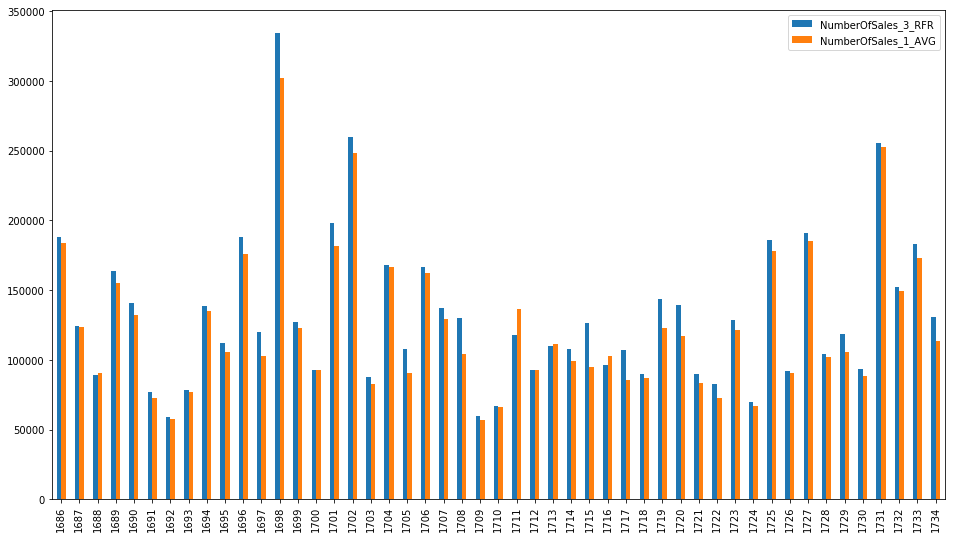

In [10]:
# how many plot to create?
n = last = 15

# first plot to be printed
first = 0

# last plot to be printed (commnet/uncomment line below)
#last = 4

assert(first < n and first < last)

n_stores = df_plt.index[-1] + 1 -1000

step = n_stores // n

idx = 1000
for i in range(0, n):
    # exit condition
    if i >= last:
        break
        
    if i >= first:
        df_slice_plt = df_plt[(df_plt.index >= idx) & (df_plt.index < idx + step)]
        df_slice_plt.drop(['NumberOfSales_4_RFR', 'NumberOfSales_2_AVG'], inplace=True, axis=1)
        df_slice_plt.plot(kind='bar', figsize=(16,9))
    idx += step


# SECOND MONTH: Bar plots for models' predictions comparison  

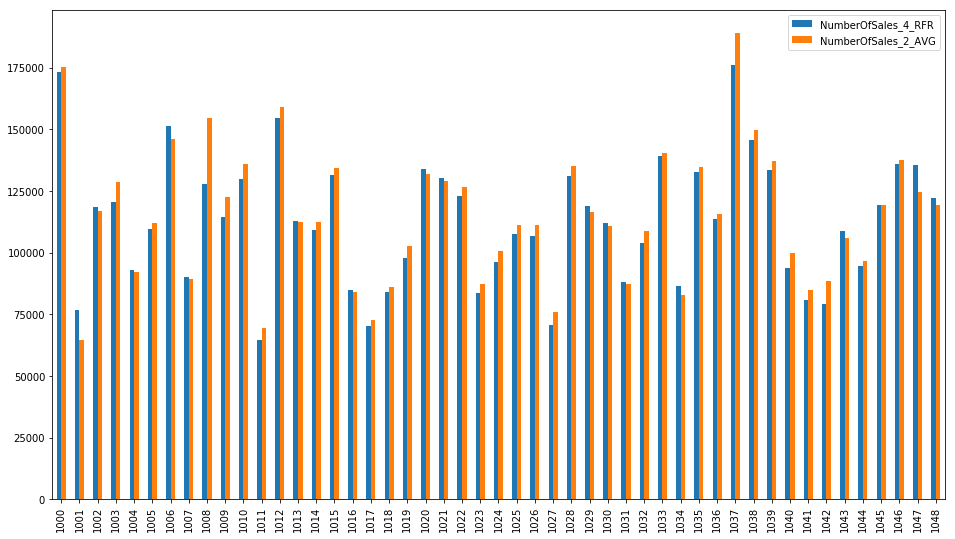

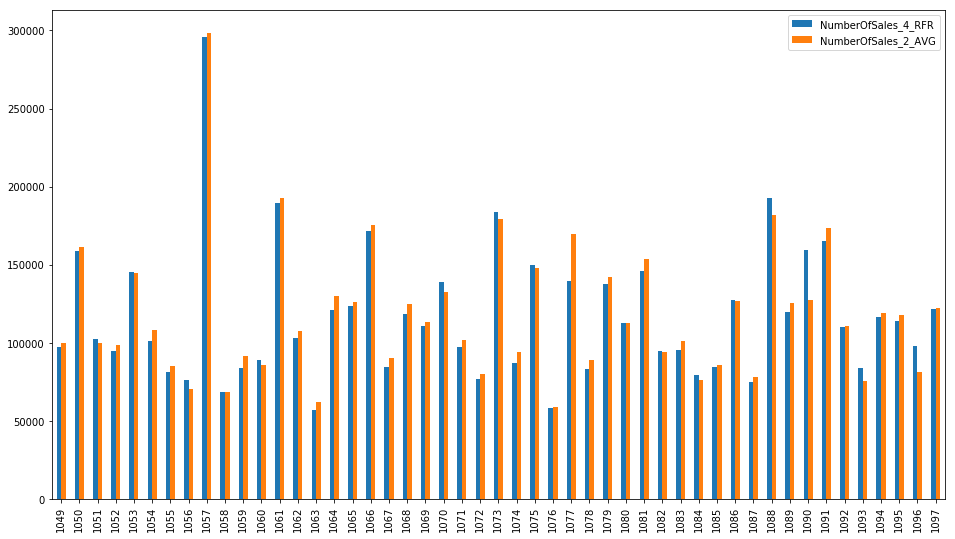

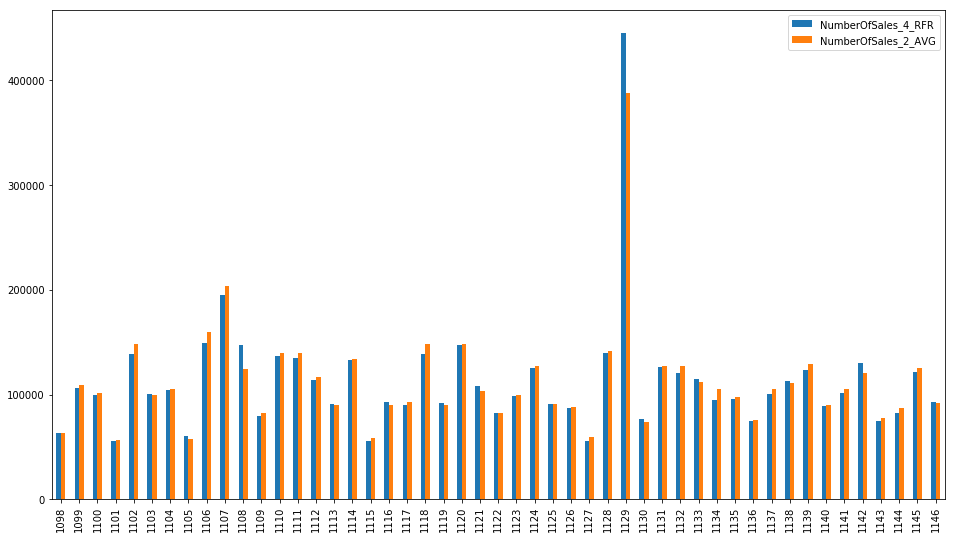

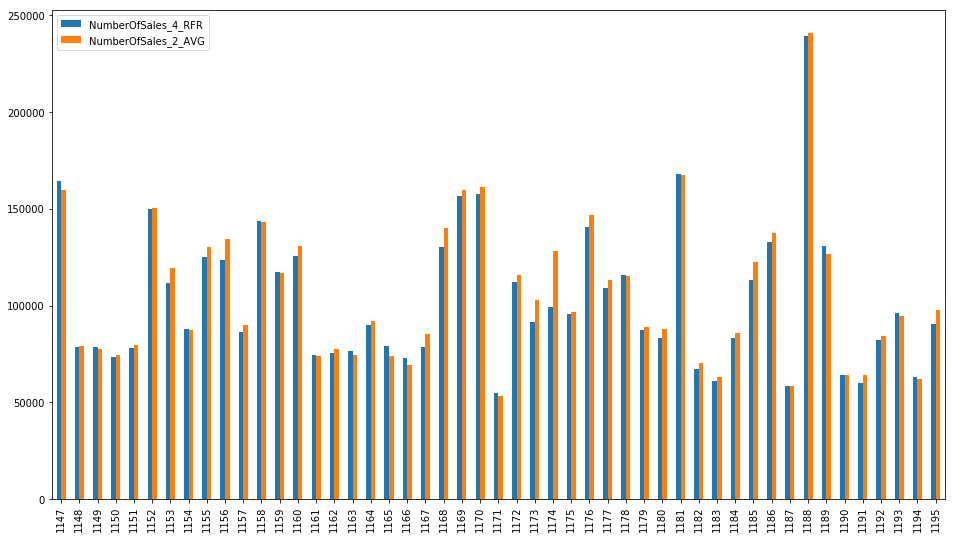

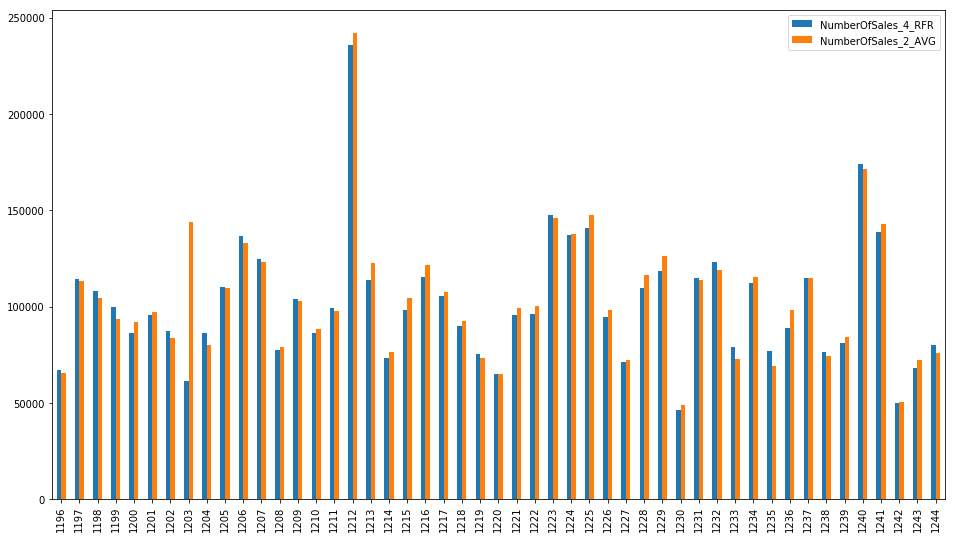

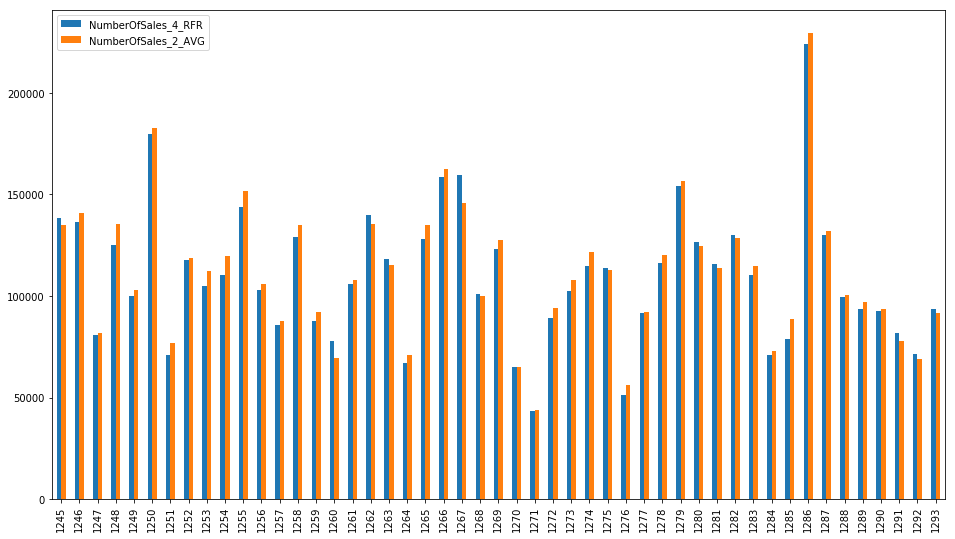

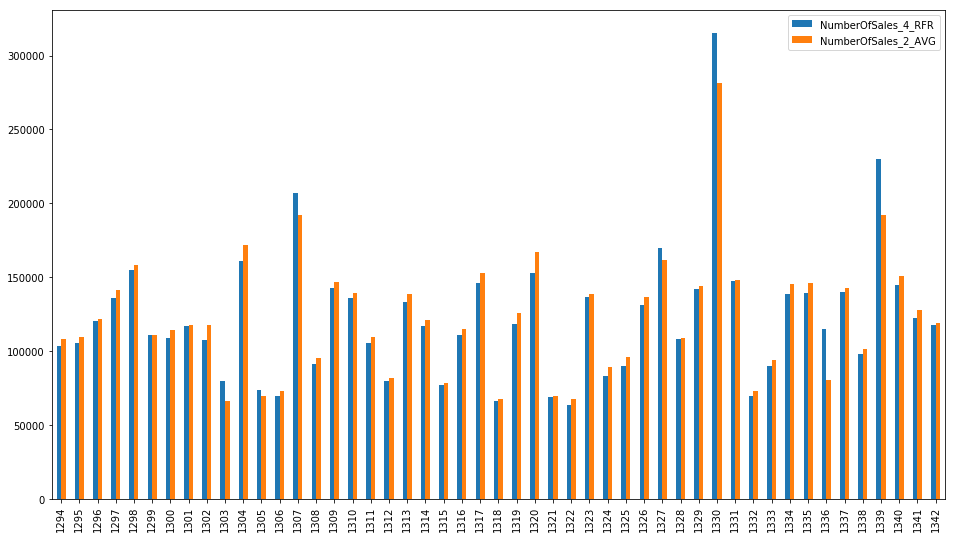

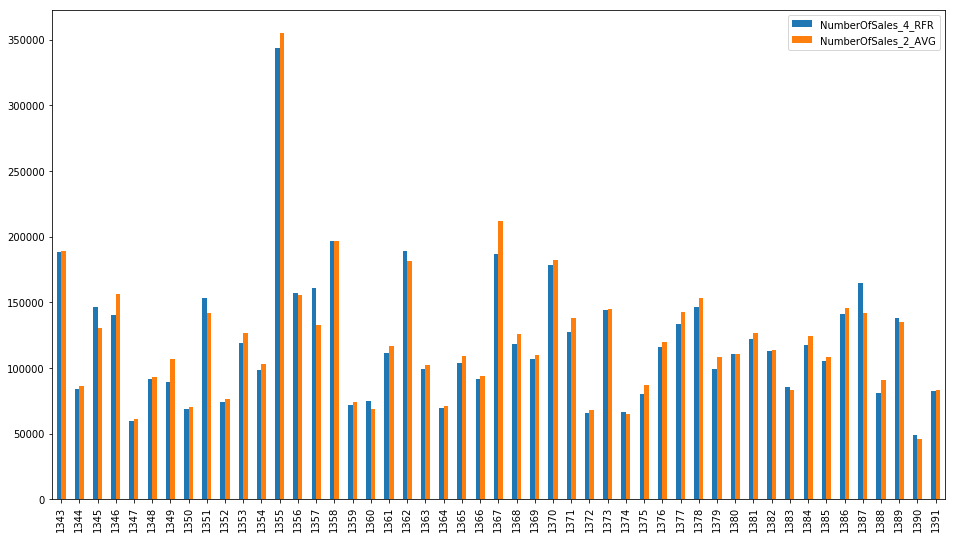

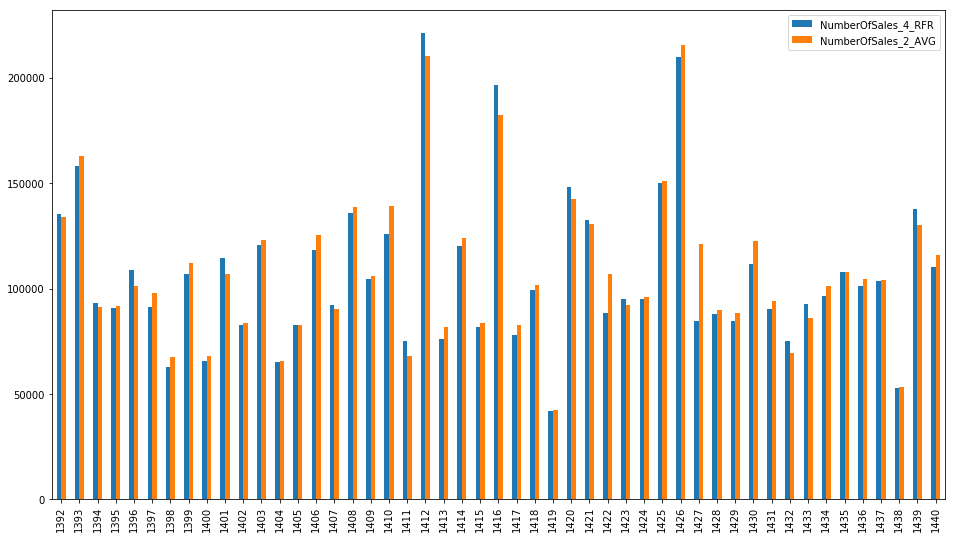

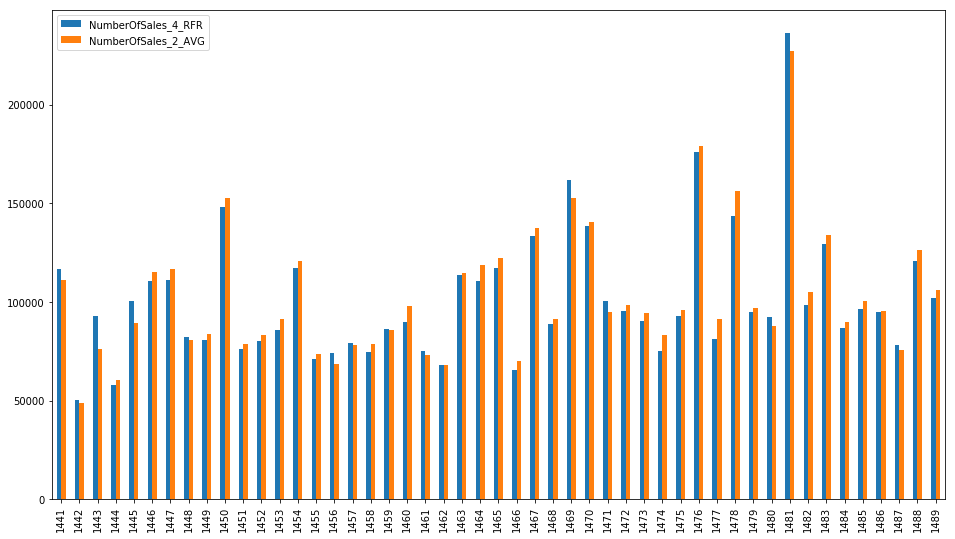

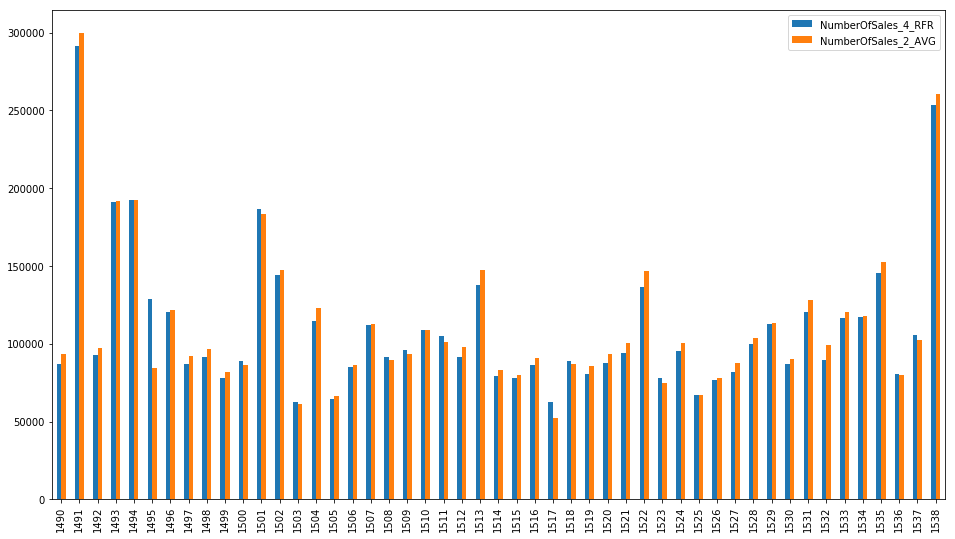

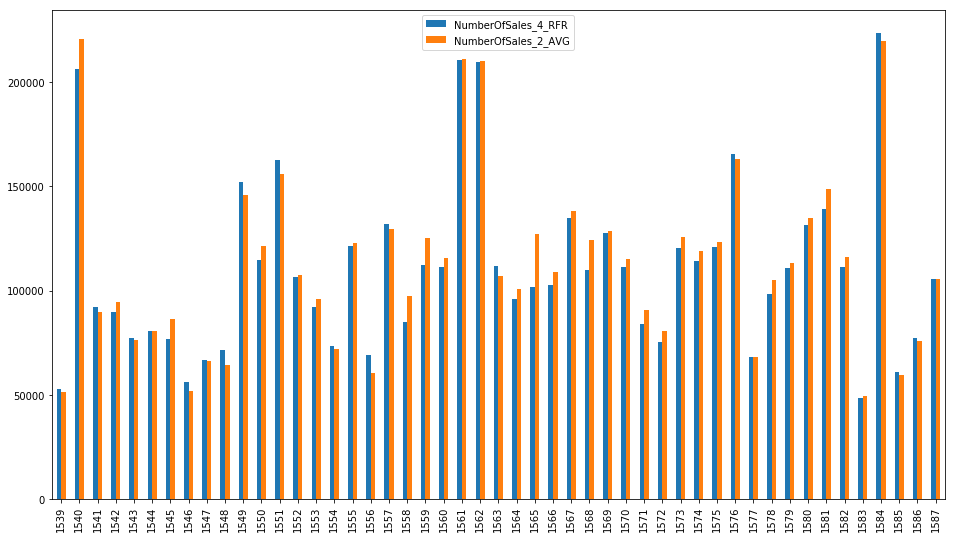

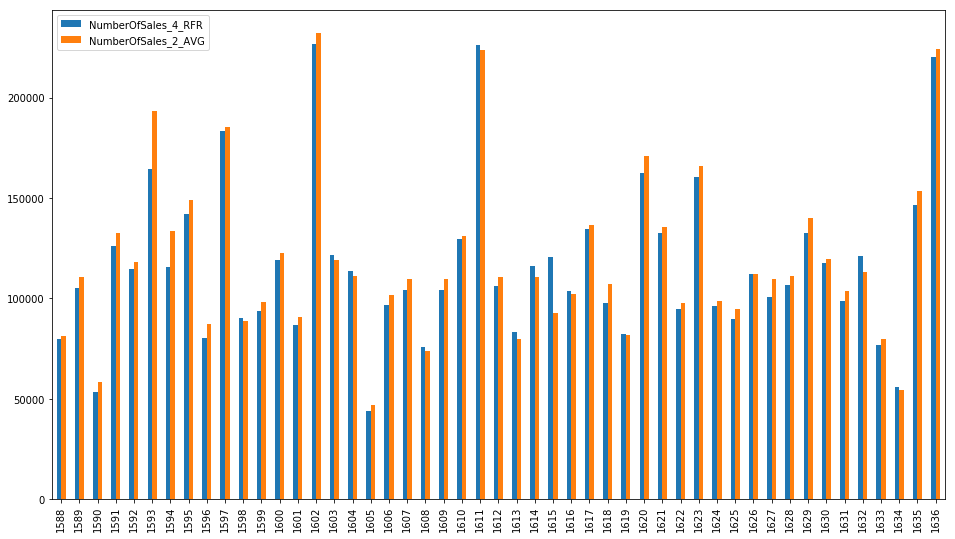

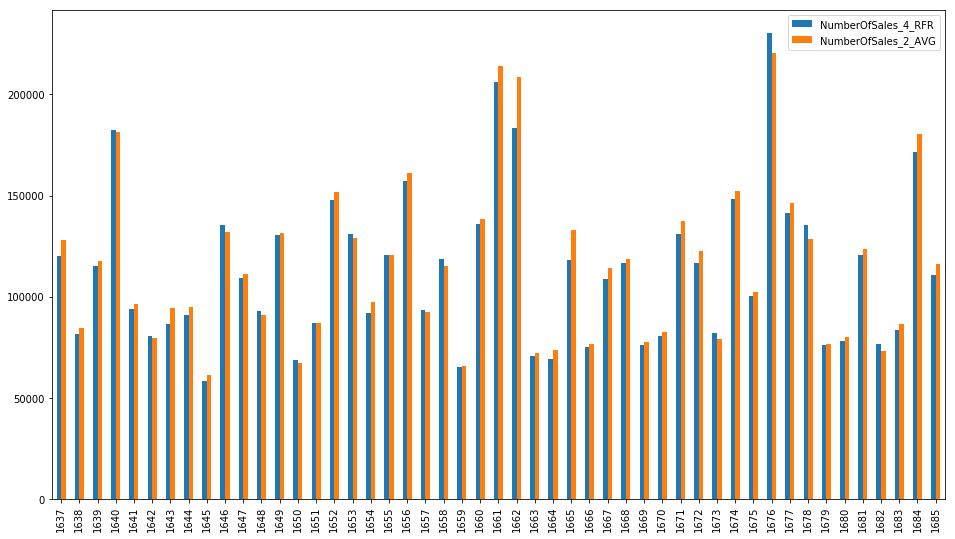

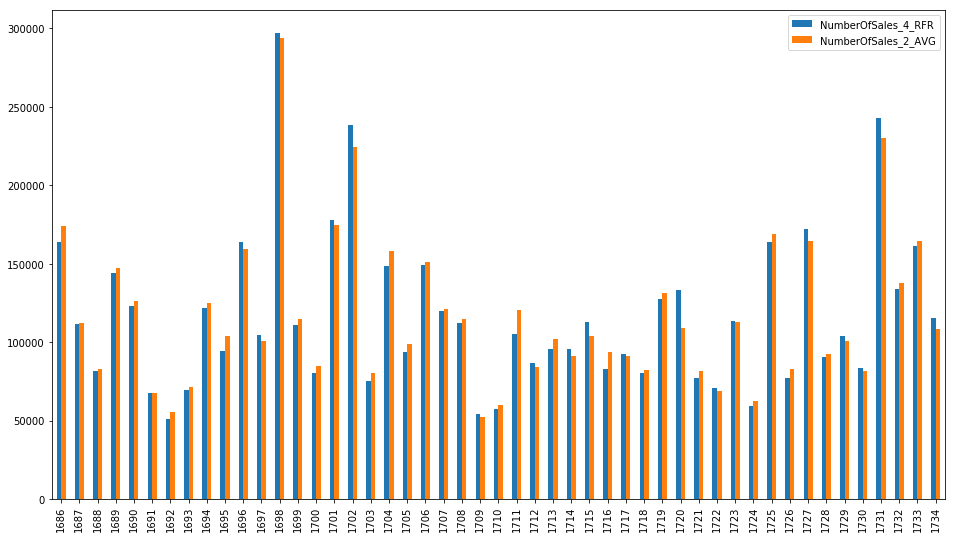

In [11]:
# how many plot to create?
n = last = 15

# first plot to be printed
first = 0

# last plot to be printed (commnet/uncomment line below)
#last = 2

assert(first < n and first < last)

n_stores = df_plt.index[-1] + 1 -1000

step = n_stores // n

idx = 1000
for i in range(0, n):
    # exit condition
    if i >= last:
        break
        
    if i >= first:
        df_slice_plt = df_plt[(df_plt.index >= idx) & (df_plt.index < idx + step)]
        df_slice_plt.drop(['NumberOfSales_3_RFR', 'NumberOfSales_1_AVG'], inplace=True, axis=1)
        df_slice_plt.plot(kind='bar', figsize=(16,9))
    idx += step
